### Physics-Informed Beer Fermentation Modelling (PINNs)




In [60]:
# Python dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json

In [61]:
# Load the uploaded CSV file (Dataset)
file_path = "data/02 - IPA - SA-05.csv"
df = pd.read_csv(file_path)

# Display the first few rows and column info to understand the structure
df.head(5), df.tail(5), df.columns # first 5 rows # last 5 rows # columns

(       Timestamp (BST)  Hours from Pitch  DO (mg/L)    pH  Gravity (°P)  \
 0  2022-06-17 16:00:00              0.01       1.72  5.77          12.0   
 1  2022-06-17 16:10:00              0.18       1.69  5.76          12.0   
 2  2022-06-17 16:20:00              0.35       1.70  5.76          12.0   
 3  2022-06-17 16:30:00              0.52       1.60  5.76          12.0   
 4  2022-06-17 16:40:00              0.68       1.54  5.76          12.0   
 
    Pressure (Bar)  Fluid Temp (°C)  Ambient Temp (°C)  Conductivity (uS/cm)  
 0            0.07             22.4               20.0                2418.0  
 1            0.07             22.2               20.0                2424.0  
 2            0.07             22.1               20.0                2427.0  
 3            0.07             22.1               19.0                2424.0  
 4            0.07             22.1               19.0                2427.0  ,
           Timestamp (BST)  Hours from Pitch  DO (mg/L)    pH  Grav

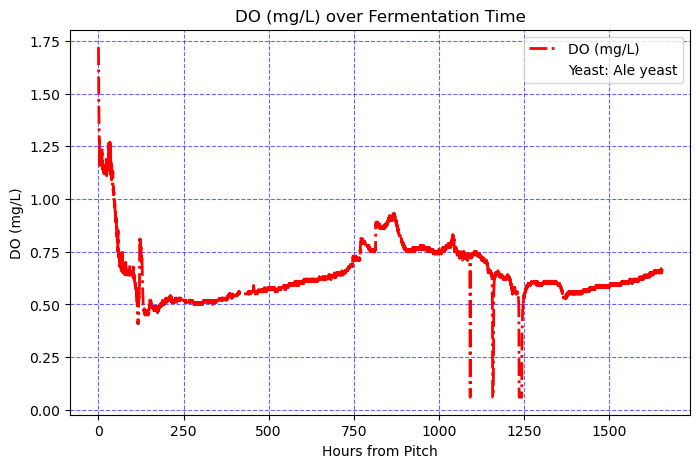

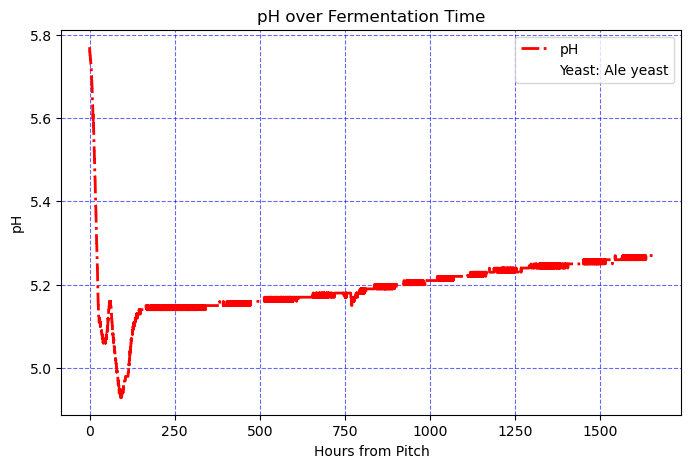

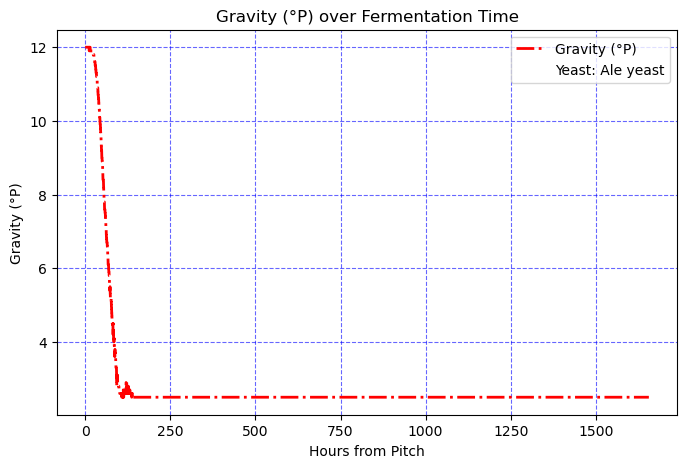

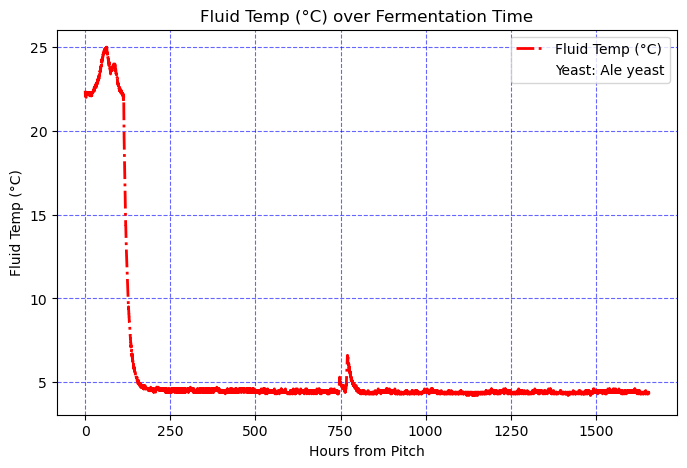

In [62]:
# Convert timestamp to datetime
df["Timestamp (BST)"] = pd.to_datetime(df["Timestamp (BST)"])

# Fermentation variables ["DO (mg/L)", "pH", "Gravity (°P)", "Fluid Temp (°C)"]
variables = ["DO (mg/L)", "pH", "Gravity (°P)", "Fluid Temp (°C)"]

# Yeast type
yeast_type = "Ale yeast"

# Plots | Figures
for var in variables:
    plt.figure(figsize=(8, 5))
    
    # Main variable line
    plt.plot(df["Hours from Pitch"], df[var], label=var, linewidth=2, color="red", linestyle="-.")
    
    # Add yeast type as a legend entry (invisible plot)
    plt.plot([], [], ' ', label=f"Yeast: {yeast_type}")
    
    plt.xlabel("Hours from Pitch")
    plt.ylabel(var)
    plt.title(f"{var} over Fermentation Time")
    plt.grid(True, linestyle="--", color="blue", alpha=0.6)
    plt.legend()
    plt.show()


In [65]:
# Information about the beer fermentation dataset
df_info = {
    "shape": df.shape,  # Number of rows and columns
    "columns": list(df.columns),  # List of column names
    "dtypes": df.dtypes.apply(lambda x: str(x)).to_dict(),  # Data types for each column
    "head": df.head(8).applymap(lambda x: str(x) if isinstance(x, pd.Timestamp) else x).to_dict(orient="list"),  # Preview first 8 rows
    "nan_counts": df.isna().sum().to_dict()  # Count missing values in each column
}

# Print the information in JSON format for readability
print(json.dumps(df_info, indent=2))

{
  "shape": [
    9933,
    9
  ],
  "columns": [
    "Timestamp (BST)",
    "Hours from Pitch",
    "DO (mg/L)",
    "pH",
    "Gravity (\u00b0P)",
    "Pressure (Bar)",
    "Fluid Temp (\u00b0C)",
    "Ambient Temp (\u00b0C)",
    "Conductivity (uS/cm)"
  ],
  "dtypes": {
    "Timestamp (BST)": "datetime64[ns]",
    "Hours from Pitch": "float64",
    "DO (mg/L)": "float64",
    "pH": "float64",
    "Gravity (\u00b0P)": "float64",
    "Pressure (Bar)": "float64",
    "Fluid Temp (\u00b0C)": "float64",
    "Ambient Temp (\u00b0C)": "float64",
    "Conductivity (uS/cm)": "float64"
  },
  "head": {
    "Timestamp (BST)": [
      "2022-06-17 16:00:00",
      "2022-06-17 16:10:00",
      "2022-06-17 16:20:00",
      "2022-06-17 16:30:00",
      "2022-06-17 16:40:00",
      "2022-06-17 16:50:00",
      "2022-06-17 17:00:00",
      "2022-06-17 17:10:00"
    ],
    "Hours from Pitch": [
      0.01,
      0.18,
      0.35,
      0.52,
      0.68,
      0.85,
      1.02,
      1.18
    ],
    

/var/folders/7q/1pqndbz17fbd8s_b61735x400000gn/T/ipykernel_16989/1581093731.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  "head": df.head(8).applymap(lambda x: str(x) if isinstance(x, pd.Timestamp) else x).to_dict(orient="list"),  # Preview first 8 rows
